In [1]:
%reload_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

import sys
import matplotlib.pyplot as plt
import numpy as np
import importlib
import os
spec = importlib.util.find_spec("pyGRBz")
if spec and spec.origin:
    pathgrbz = os.path.dirname(spec.origin)
    path = os.getcwd()

# Fit only one Light Curve

In [4]:
from pyGRBz.pyGRBz import GRB_photoZ

In [5]:
# Load module
photoz = GRB_photoZ(
    output_dir='/results/Tuto/LC/')

In [6]:
# Load the same GRB but with its light curve stored in data/lc/
photoz.load_data(data_dir='/data/lc/',data_name=['GRB_22'])


Observations:
  Name  time_since_burst band   flux  ...  zp flux_unit detection telescope
------ ---------------- ---- ------- ... --- --------- --------- ---------
GRB_22             60.0  gri  18.723 ...   -        AB         1   colibri
GRB_22             60.0   zy 17.6187 ...   -        AB         1   colibri
GRB_22             95.0    r 19.4355 ...   -        AB         1   colibri
GRB_22             95.0    y 18.1537 ...   -        AB         1   colibri
GRB_22            130.0    i 18.8971 ...   -        AB         1   colibri
GRB_22            130.0    z 18.7193 ...   -        AB         1   colibri
GRB_22            165.0    g 21.7265 ...   -        AB         0   colibri
GRB_22            165.0    y  18.943 ...   -        AB         1   colibri
GRB_22            200.0    r  20.508 ...   -        AB         1   colibri
GRB_22            200.0    z  19.348 ...   -        AB         1   colibri
GRB_22            235.0    i 19.7658 ...   -        AB         1   colibri
GRB_22   

In [7]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


SEDS formatted:
  Name  time_since_burst band ... ext_mag     flux_corr        flux_corr_err   
                             ...              microJy            microJy      
------ ---------------- ---- ... ------- ------------------ ------------------
GRB_22            270.0    g ...     0.0 7.4028679049192725 1.4652919723935014
GRB_22            165.0    g ...     0.0 7.4028679049192725 1.4652919723935014
GRB_22             60.0  gri ...     0.0 117.70637907805646  2.354127581561129
GRB_22            305.0    r ...     0.0 12.701060946255039  1.572571249775574
GRB_22            200.0    r ...     0.0  22.74049950895895 1.6564315268830543
GRB_22             95.0    r ...     0.0  61.06607404788323  1.941222164508934
GRB_22            235.0    i ...     0.0 45.048465286530316 2.1900637513411727
GRB_22            130.0    i ...     0.0 100.26745690029624  2.489310666864795
GRB_22            340.0    i ...     0.0 26.964973635434053 2.0889292002809032
GRB_22            130.0    z ...  

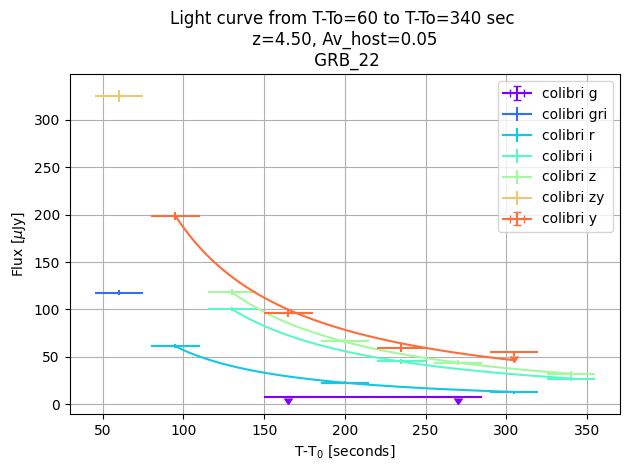

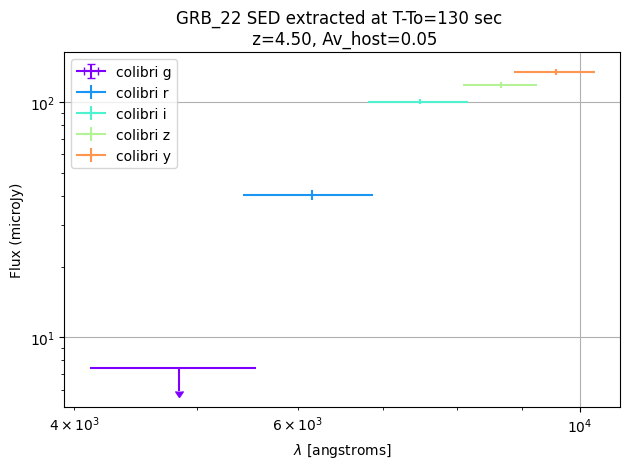


SEDS:
  Name  time_since_burst band        flux              flux_err       flux_unit
              s                                                               
------ ---------------- ---- ------------------ -------------------- ---------
GRB_22              130    g 21.726549533189363  0.21491577961998018        AB
GRB_22              130    r  19.89043728655026 0.052477661754920385        AB
GRB_22              130    i 18.897100000000002  0.02695525347364949        AB
GRB_22              130    z 18.719299999999997  0.02814983106668307        AB
GRB_22              130    y  18.57916555771549  0.03611609264182424        AB



In [8]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

#photoz.extract_sed(model='SPL',method='ReddestBand')
#photoz.extract_sed(model='BPL',method='fixed',time_SED=70)
photoz.extract_sed(model='SPL',method='fixed',time_SED=130)

In [9]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,10],beta=[0,3],norm=[0,10])



Fit 1/1 	 Object: GRB_22 

z_lit: -99.00   Av_lit: -99.00
Running production


/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
  0%|                                                                   | 0/1500 [00:00<?, ?it/s]/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBaglow/igm.py:77: RuntimeWarning: invalid value encountered in power
  tau_


Autocorrelation time: 106.82 steps


Mean acceptance fraction: 0.145

Best fit:
z: 3.170  Av: 1.178  beta: 0.728  Norm: 9.861     chi2: 8.209

Mean Proba: 3.57e-03
Sum Proba: 1.18e+02

68% - 1 sigma:
z: 3.092 +0.055 -0.110
Av: 1.166 +0.030 -0.050
Beta: 0.902 +0.218 -0.263
norm: 9.275 +0.535 -1.645

95% - 2 sigma:
z: 3.092 +0.076 -3.084
Av: 1.166 +2.496 -0.131
Beta: 0.902 +0.442 -0.878
norm: 9.275 +0.695 -4.772

99% - 3 sigma:
z: 3.092 +1.803 -3.091
Av: 1.166 +3.085 -0.661
Beta: 0.902 +0.964 -0.899
norm: 9.275 +0.723 -5.873


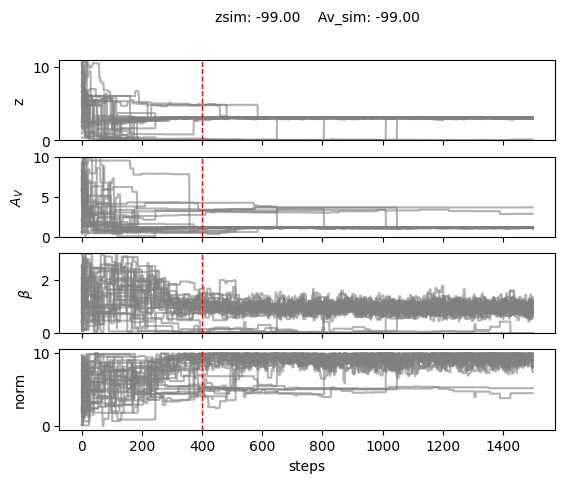

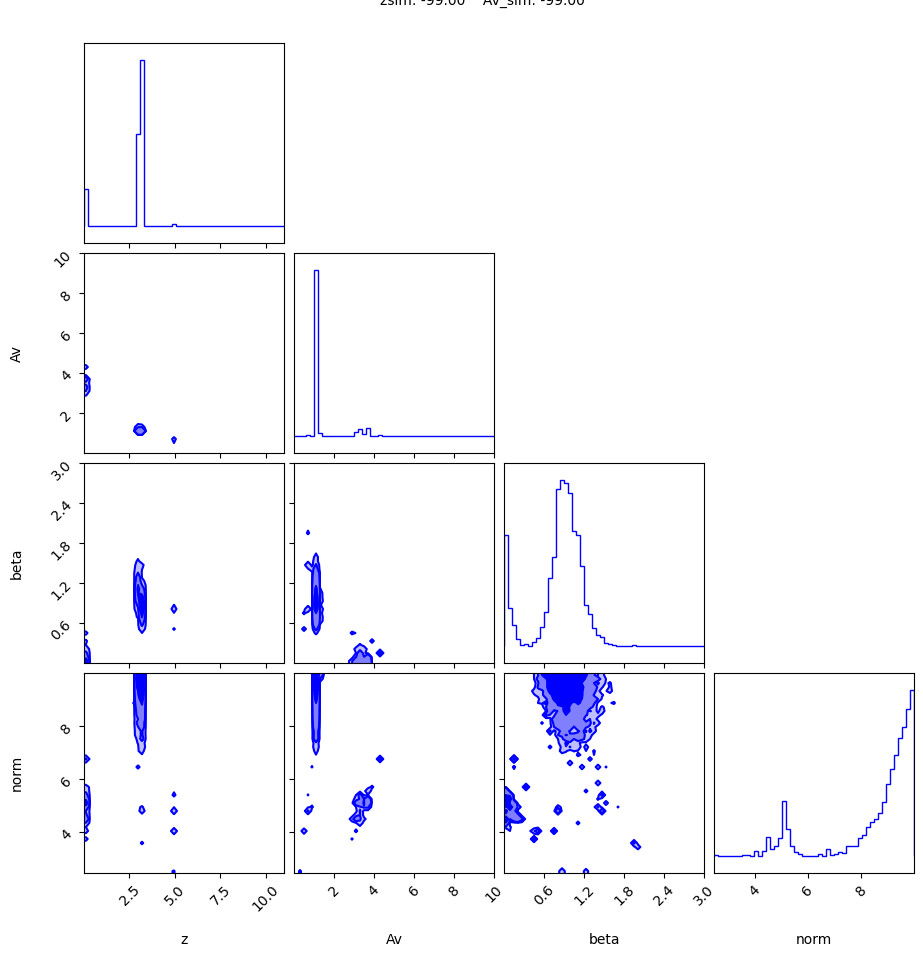


For best SED plot:
- Median values PDF: 3.092 1.166 0.902 9.275
- Best fit: 3.170 1.178 0.728 9.861


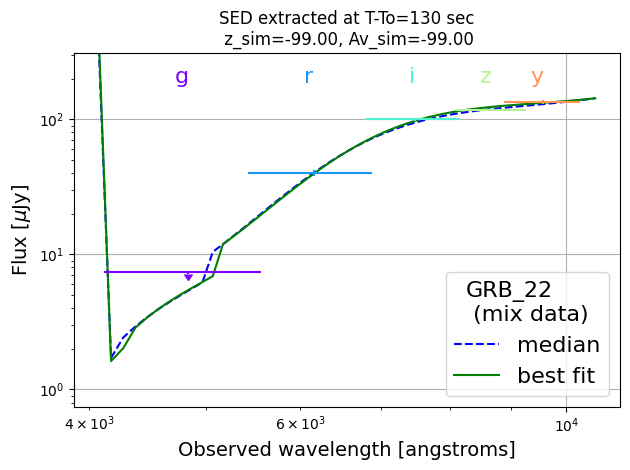


List of GRB not detected: []

None


Fit 1/1 	 Object: GRB_22 

z_lit: -99.00   Av_lit: -99.00
Running production


/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBz/fitting.py:175: RuntimeWarning: divide by zero encountered in log
  lnlik += np.sum(np.log(residuals_edf[~mask]))
  0%|                                                                   | 0/1500 [00:00<?, ?it/s]/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBaglow/igm.py:77: RuntimeWarning: invalid value encountered in power
  tau_a = 0.00211 * np.power(1.0 + redshift, 3.7)
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBaglow/igm.py:77: RuntimeWarning: invalid value encountered in power
  tau_a = 0.00211 * np.power(1.0 + redshift, 3.7)
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBaglow/igm.py:139: RuntimeWarning: invalid value encountered in scalar power
  (1.0 + redshift) ** (2.5 - (3 * n))
/Users/nyavorak/miniforge3/envs/photoZ/lib/python3.12/site-packages/pyGRBaglow/igm.py:139: RuntimeWarning: invalid value encountered in scalar po


Autocorrelation time: 136.49 steps


Mean acceptance fraction: 0.134

Best fit:
z: 4.562  Av: 0.002  beta: 1.048  Norm: 1.008     chi2: 4.629

Mean Proba: 2.70e-02
Sum Proba: 8.90e+02

68% - 1 sigma:
z: 4.504 +0.051 -0.052
Av: 0.124 +0.070 -0.074
Beta: 0.518 +0.403 -0.337
norm: 1.631 +0.499 -0.405

95% - 2 sigma:
z: 4.504 +0.062 -1.165
Av: 0.124 +0.532 -0.114
Beta: 0.518 +0.702 -0.483
norm: 1.631 +5.043 -0.585

99% - 3 sigma:
z: 4.504 +0.114 -4.492
Av: 0.124 +5.801 -0.124
Beta: 0.518 +1.053 -0.512
norm: 1.631 +8.230 -0.648


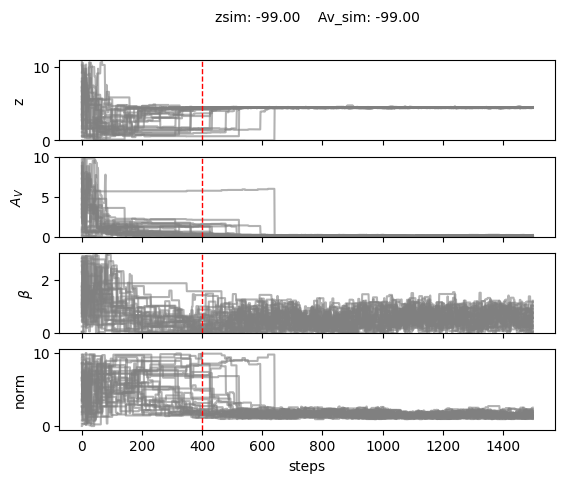

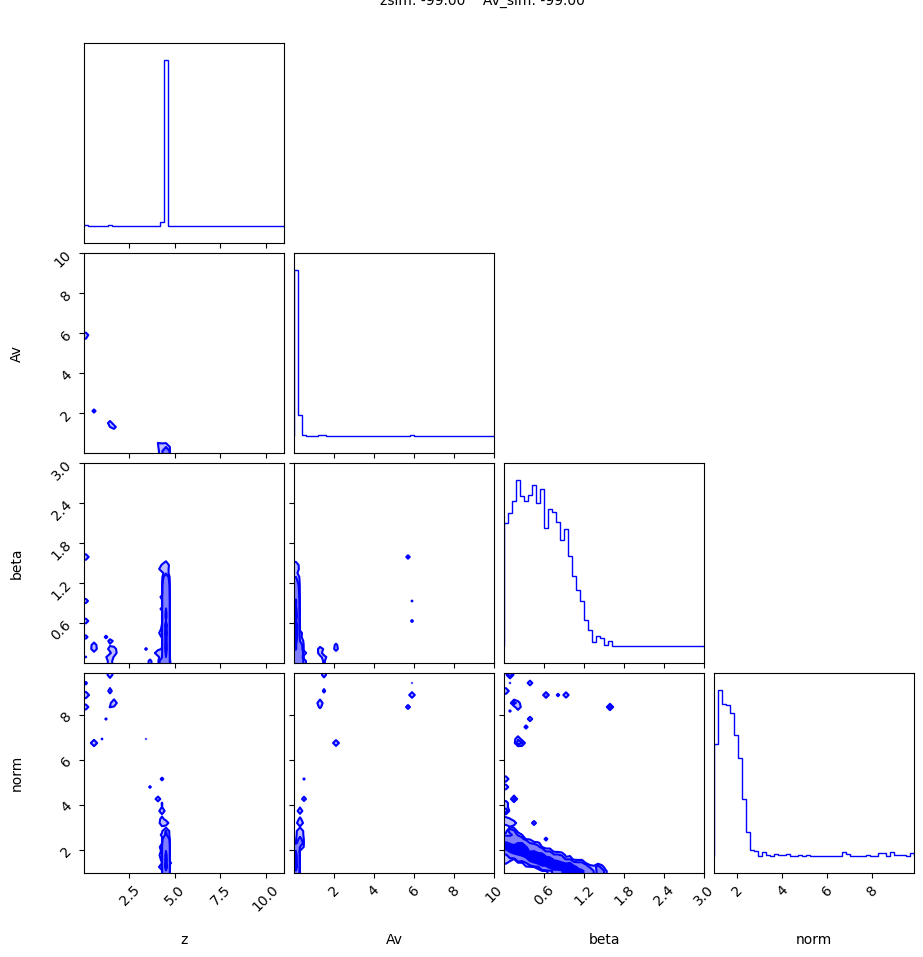


For best SED plot:
- Median values PDF: 4.504 0.124 0.518 1.631
- Best fit: 4.562 0.002 1.048 1.008


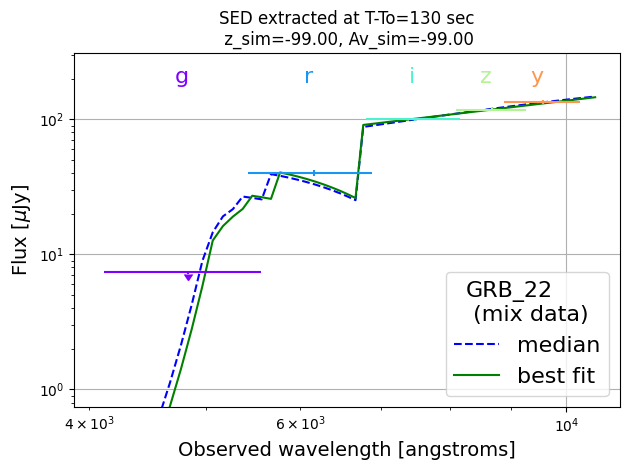


List of GRB not detected: []

None


In [10]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase
# Nsteps2: number of steps for the second burn-in phase
# Nsteps3: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'

#plo = ['smc', 'lmc', 'mw', 'nodust',"sne"]
plo = ["sne","smc"]
for law in plo:
    photoz.fit(
    ext_law=law,
    Nthreads=6,
    nwalkers=30,
    Nsteps1=0,
    Nsteps2=1500,
    nburn=400,
    Host_dust=True,
    Host_gas=False,
    igm_att='Meiksin',
    clean_data=False,
    priors=priors,
    adapt_z=False
)

# Statistic comparison

In [11]:
from pyGRBz.estimation import stats

In [13]:
out = (path+"/results/Tuto/LC/GRB_22/")

In [14]:
stats(out,ext_laws=plo,lim_bic=2)

Best fit is with the - smc - extinction law
GRB not resolved with BIC threshold of  2
